In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'GFNORTEO.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,107.489998,101.209999,102.599998,105.330002,8519758.0,99.885101
2019-03-21,105.690002,103.809998,104.610001,105.459999,5770973.0,100.008377
2019-03-22,105.889999,100.019997,104.709999,101.239998,5821815.0,96.006523
2019-03-25,105.279999,101.800003,101.809998,105.000000,4285801.0,99.572159
2019-03-26,106.139999,104.209999,104.860001,105.180000,6735171.0,99.742851


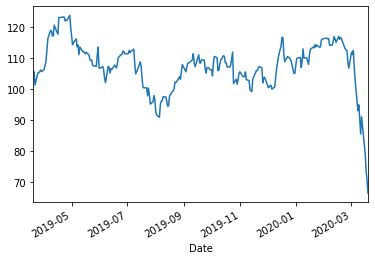

In [4]:
%matplotlib inline 
data.Close.plot()

In [5]:
def OM(df, n):
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))
    df = df.join(M)
    return df

In [6]:
df = OM(data, 50)

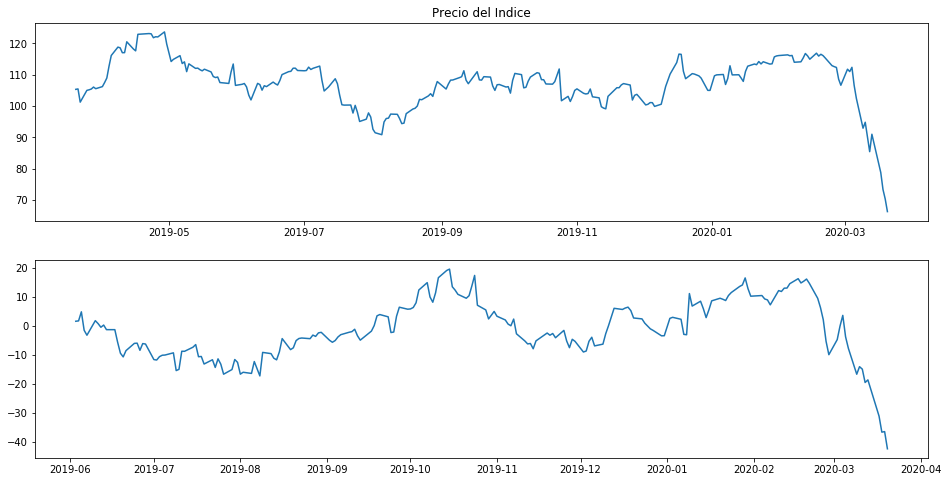

In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df.Momentum_50)
plt.show()

In [8]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    return df

In [9]:
df2 = ROC(data, 50)

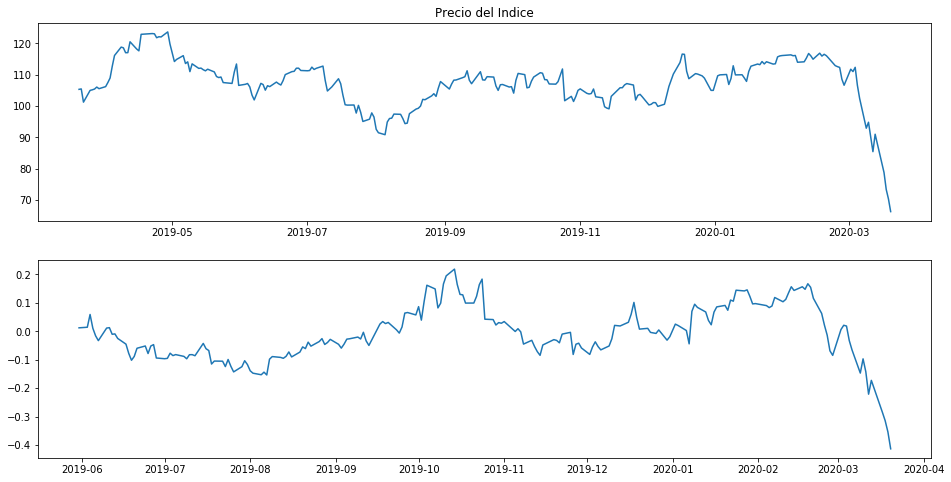

In [10]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.show()

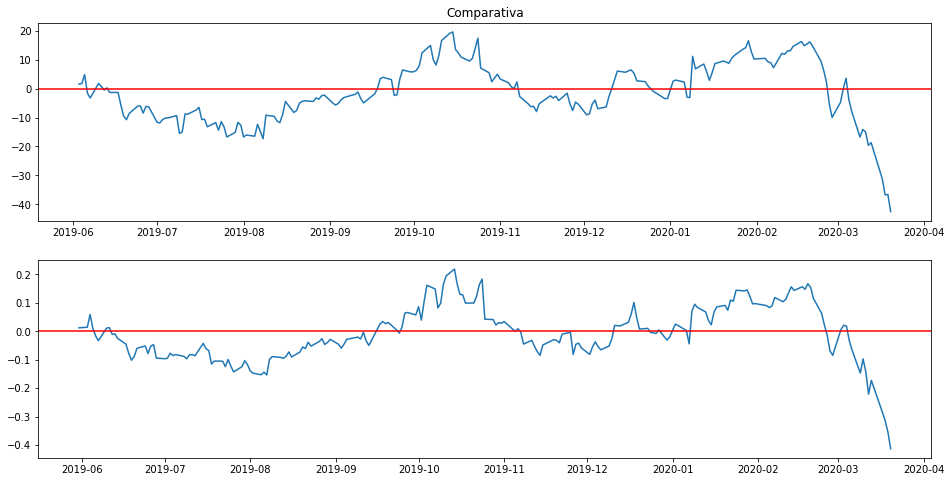

In [11]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color= 'r')
plt.title('Comparativa')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color= 'r')
plt.show()